<a href="https://colab.research.google.com/github/parvezmosaraf/Machine-Learning-Project/blob/main/Postpartum_Depression_Detection_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/PostNatal/post natal data.csv')
df

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,6/14/2022 20:02,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,6/14/2022 20:03,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,6/14/2022 20:04,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,6/14/2022 20:05,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,6/14/2022 20:06,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
1498,6/15/2022 0:35,30-35,Yes,No,Two or more days a week,No,No,Yes,Maybe,Sometimes,No
1499,6/15/2022 0:35,25-30,Sometimes,No,No,Often,No,Yes,Maybe,Yes,No
1500,6/15/2022 0:35,25-30,No,Sometimes,Two or more days a week,No,No,No,Yes,No,Not interested to say
1501,6/15/2022 0:36,25-30,No,Sometimes,Yes,Often,No,Yes,No,No,No


In [ ]:
df.head()

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,6/14/2022 20:02,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,6/14/2022 20:03,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,6/14/2022 20:04,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,6/14/2022 20:05,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,6/14/2022 20:06,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No


In [ ]:
df = df.drop(['Timestamp'], axis = 1)
df

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...
1498,30-35,Yes,No,Two or more days a week,No,No,Yes,Maybe,Sometimes,No
1499,25-30,Sometimes,No,No,Often,No,Yes,Maybe,Yes,No
1500,25-30,No,Sometimes,Two or more days a week,No,No,No,Yes,No,Not interested to say
1501,25-30,No,Sometimes,Yes,Often,No,Yes,No,No,No


In [ ]:
# checking for missing values
df.isnull().sum()

Age                                           0
Feeling sad or Tearful                        0
Irritable towards baby & partner              6
Trouble sleeping at night                     0
Problems concentrating or making decision    12
Overeating or loss of appetite                0
Feeling anxious                               0
Feeling of guilt                              9
Problems of bonding with baby                 0
Suicide attempt                               0
dtype: int64

In [ ]:
df['Irritable towards baby & partner'] = df['Irritable towards baby & partner'].fillna(method = 'bfill')
df['Problems concentrating or making decision'] = df['Problems concentrating or making decision'].fillna(method = 'bfill')
df['Feeling of guilt'] = df['Feeling of guilt'].fillna(method = 'bfill')

In [ ]:
# checking for missing values
df.isnull().sum()

Age                                          0
Feeling sad or Tearful                       0
Irritable towards baby & partner             0
Trouble sleeping at night                    0
Problems concentrating or making decision    0
Overeating or loss of appetite               0
Feeling anxious                              0
Feeling of guilt                             0
Problems of bonding with baby                0
Suicide attempt                              0
dtype: int64

In [ ]:
df.head()

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No


In [ ]:
df['Feeling sad or Tearful'].unique()

array(['Yes', 'No', 'Sometimes'], dtype=object)

In [ ]:
ordinal=['Yes', 'No', 'Sometimes']

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ord=OrdinalEncoder(categories=[ordinal])
ord.fit(df[['Feeling sad or Tearful']])

OrdinalEncoder(categories=[['Yes', 'No', 'Sometimes']])

In [ ]:
final=pd.DataFrame(ord.fit_transform(df[['Feeling sad or Tearful']]))
final

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
1498,0.0
1499,2.0
1500,1.0
1501,1.0


In [ ]:
df['Feeling sad or Tearful']=final
df

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,35-40,0.0,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,40-45,0.0,No,No,Yes,Yes,No,Yes,Yes,No
2,35-40,0.0,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,35-40,0.0,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,40-45,0.0,No,Two or more days a week,Yes,No,Yes,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...
1498,30-35,0.0,No,Two or more days a week,No,No,Yes,Maybe,Sometimes,No
1499,25-30,2.0,No,No,Often,No,Yes,Maybe,Yes,No
1500,25-30,1.0,Sometimes,Two or more days a week,No,No,No,Yes,No,Not interested to say
1501,25-30,1.0,Sometimes,Yes,Often,No,Yes,No,No,No


In [ ]:
df['Irritable towards baby & partner'].unique()

array(['Yes', 'No', 'Sometimes'], dtype=object)

In [ ]:
ordinal=['Yes', 'No', 'Sometimes']

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ord=OrdinalEncoder(categories=[ordinal])
ord.fit(df[['Irritable towards baby & partner']])

OrdinalEncoder(categories=[['Yes', 'No', 'Sometimes']])

In [ ]:
final2=pd.DataFrame(ord.fit_transform(df[['Irritable towards baby & partner']]))
final2

,0
0,0.0
1,1.0
2,1.0
3,0.0
4,1.0
...,...
1498,1.0
1499,1.0
1500,2.0
1501,2.0


In [ ]:
df['Irritable towards baby & partner']=final2
df

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,35-40,0.0,0.0,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,40-45,0.0,1.0,No,Yes,Yes,No,Yes,Yes,No
2,35-40,0.0,1.0,Yes,Yes,Yes,Yes,No,Sometimes,No
3,35-40,0.0,0.0,Yes,Yes,No,Yes,Maybe,No,No
4,40-45,0.0,1.0,Two or more days a week,Yes,No,Yes,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...
1498,30-35,0.0,1.0,Two or more days a week,No,No,Yes,Maybe,Sometimes,No
1499,25-30,2.0,1.0,No,Often,No,Yes,Maybe,Yes,No
1500,25-30,1.0,2.0,Two or more days a week,No,No,No,Yes,No,Not interested to say
1501,25-30,1.0,2.0,Yes,Often,No,Yes,No,No,No


In [ ]:
df['Trouble sleeping at night'].unique()

array(['Two or more days a week', 'No', 'Yes'], dtype=object)

In [ ]:
ordinal=['Two or more days a week', 'No', 'Yes']

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ord=OrdinalEncoder(categories=[ordinal])
ord.fit(df[['Trouble sleeping at night']])

OrdinalEncoder(categories=[['Two or more days a week', 'No', 'Yes']])

In [ ]:
final3=pd.DataFrame(ord.fit_transform(df[['Trouble sleeping at night']]))
final3

,0
0,0.0
1,1.0
2,2.0
3,2.0
4,0.0
...,...
1498,0.0
1499,1.0
1500,0.0
1501,2.0


In [ ]:
df['Trouble sleeping at night']=final3
df

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,35-40,0.0,0.0,0.0,Yes,Yes,Yes,No,Yes,Yes
1,40-45,0.0,1.0,1.0,Yes,Yes,No,Yes,Yes,No
2,35-40,0.0,1.0,2.0,Yes,Yes,Yes,No,Sometimes,No
3,35-40,0.0,0.0,2.0,Yes,No,Yes,Maybe,No,No
4,40-45,0.0,1.0,0.0,Yes,No,Yes,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...
1498,30-35,0.0,1.0,0.0,No,No,Yes,Maybe,Sometimes,No
1499,25-30,2.0,1.0,1.0,Often,No,Yes,Maybe,Yes,No
1500,25-30,1.0,2.0,0.0,No,No,No,Yes,No,Not interested to say
1501,25-30,1.0,2.0,2.0,Often,No,Yes,No,No,No


In [ ]:
df['Problems concentrating or making decision'].unique()

array(['Yes', 'No', 'Often'], dtype=object)

In [ ]:
ordinal=['Yes', 'No', 'Often']

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ord=OrdinalEncoder(categories=[ordinal])
ord.fit(df[['Problems concentrating or making decision']])

OrdinalEncoder(categories=[['Yes', 'No', 'Often']])

In [ ]:
final4=pd.DataFrame(ord.fit_transform(df[['Problems concentrating or making decision']]))
final4

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
1498,1.0
1499,2.0
1500,1.0
1501,2.0


In [ ]:
df['Problems concentrating or making decision']=final4
df

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,35-40,0.0,0.0,0.0,0.0,Yes,Yes,No,Yes,Yes
1,40-45,0.0,1.0,1.0,0.0,Yes,No,Yes,Yes,No
2,35-40,0.0,1.0,2.0,0.0,Yes,Yes,No,Sometimes,No
3,35-40,0.0,0.0,2.0,0.0,No,Yes,Maybe,No,No
4,40-45,0.0,1.0,0.0,0.0,No,Yes,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...
1498,30-35,0.0,1.0,0.0,1.0,No,Yes,Maybe,Sometimes,No
1499,25-30,2.0,1.0,1.0,2.0,No,Yes,Maybe,Yes,No
1500,25-30,1.0,2.0,0.0,1.0,No,No,Yes,No,Not interested to say
1501,25-30,1.0,2.0,2.0,2.0,No,Yes,No,No,No


In [ ]:
df['Feeling anxious'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
ordinal=['No', 'Yes']

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ord=OrdinalEncoder(categories=[ordinal])
ord.fit(df[['Feeling anxious']])

OrdinalEncoder(categories=[['No', 'Yes']])

In [ ]:
final5=pd.DataFrame(ord.fit_transform(df[['Feeling anxious']]))
final5

,0
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
1498,1.0
1499,1.0
1500,0.0
1501,1.0


In [ ]:
df['Feeling anxious']=final5
df

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,35-40,0.0,0.0,0.0,0.0,Yes,1.0,No,Yes,Yes
1,40-45,0.0,1.0,1.0,0.0,Yes,0.0,Yes,Yes,No
2,35-40,0.0,1.0,2.0,0.0,Yes,1.0,No,Sometimes,No
3,35-40,0.0,0.0,2.0,0.0,No,1.0,Maybe,No,No
4,40-45,0.0,1.0,0.0,0.0,No,1.0,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...
1498,30-35,0.0,1.0,0.0,1.0,No,1.0,Maybe,Sometimes,No
1499,25-30,2.0,1.0,1.0,2.0,No,1.0,Maybe,Yes,No
1500,25-30,1.0,2.0,0.0,1.0,No,0.0,Yes,No,Not interested to say
1501,25-30,1.0,2.0,2.0,2.0,No,1.0,No,No,No


In [ ]:
df['Feeling of guilt'].unique()

array(['No', 'Yes', 'Maybe'], dtype=object)

In [ ]:
ordinal=['No', 'Yes', 'Maybe']

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ord=OrdinalEncoder(categories=[ordinal])
ord.fit(df[['Feeling of guilt']])

OrdinalEncoder(categories=[['No', 'Yes', 'Maybe']])

In [ ]:
final6=pd.DataFrame(ord.fit_transform(df[['Feeling of guilt']]))
final6

,0
0,0.0
1,1.0
2,0.0
3,2.0
4,0.0
...,...
1498,2.0
1499,2.0
1500,1.0
1501,0.0


In [ ]:
df['Feeling of guilt']=final6
df

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,35-40,0.0,0.0,0.0,0.0,Yes,1.0,0.0,Yes,Yes
1,40-45,0.0,1.0,1.0,0.0,Yes,0.0,1.0,Yes,No
2,35-40,0.0,1.0,2.0,0.0,Yes,1.0,0.0,Sometimes,No
3,35-40,0.0,0.0,2.0,0.0,No,1.0,2.0,No,No
4,40-45,0.0,1.0,0.0,0.0,No,1.0,0.0,Yes,No
...,...,...,...,...,...,...,...,...,...,...
1498,30-35,0.0,1.0,0.0,1.0,No,1.0,2.0,Sometimes,No
1499,25-30,2.0,1.0,1.0,2.0,No,1.0,2.0,Yes,No
1500,25-30,1.0,2.0,0.0,1.0,No,0.0,1.0,No,Not interested to say
1501,25-30,1.0,2.0,2.0,2.0,No,1.0,0.0,No,No


In [ ]:
df['Problems of bonding with baby'].unique()

array(['Yes', 'Sometimes', 'No'], dtype=object)

In [ ]:
ordinal=['Yes', 'Sometimes', 'No']

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ord=OrdinalEncoder(categories=[ordinal])
ord.fit(df[['Problems of bonding with baby']])

OrdinalEncoder(categories=[['Yes', 'Sometimes', 'No']])

In [ ]:
final7=pd.DataFrame(ord.fit_transform(df[['Problems of bonding with baby']]))
final7

,0
0,0.0
1,0.0
2,1.0
3,2.0
4,0.0
...,...
1498,1.0
1499,0.0
1500,2.0
1501,2.0


In [ ]:
df['Problems of bonding with baby']=final7
df

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,35-40,0.0,0.0,0.0,0.0,Yes,1.0,0.0,0.0,Yes
1,40-45,0.0,1.0,1.0,0.0,Yes,0.0,1.0,0.0,No
2,35-40,0.0,1.0,2.0,0.0,Yes,1.0,0.0,1.0,No
3,35-40,0.0,0.0,2.0,0.0,No,1.0,2.0,2.0,No
4,40-45,0.0,1.0,0.0,0.0,No,1.0,0.0,0.0,No
...,...,...,...,...,...,...,...,...,...,...
1498,30-35,0.0,1.0,0.0,1.0,No,1.0,2.0,1.0,No
1499,25-30,2.0,1.0,1.0,2.0,No,1.0,2.0,0.0,No
1500,25-30,1.0,2.0,0.0,1.0,No,0.0,1.0,2.0,Not interested to say
1501,25-30,1.0,2.0,2.0,2.0,No,1.0,0.0,2.0,No


In [ ]:
df['Overeating or loss of appetite'].unique()

array(['Yes', 'No', 'Not at all'], dtype=object)

In [ ]:
ordinal=['Yes', 'No', 'Not at all']

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ord=OrdinalEncoder(categories=[ordinal])
ord.fit(df[['Overeating or loss of appetite']])

OrdinalEncoder(categories=[['Yes', 'No', 'Not at all']])

In [ ]:
final9=pd.DataFrame(ord.fit_transform(df[['Overeating or loss of appetite']]))
final9

,0
0,0.0
1,0.0
2,0.0
3,1.0
4,1.0
...,...
1498,1.0
1499,1.0
1500,1.0
1501,1.0


In [ ]:
df['Overeating or loss of appetite']=final9
df

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,35-40,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Yes
1,40-45,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,No
2,35-40,0.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,No
3,35-40,0.0,0.0,2.0,0.0,1.0,1.0,2.0,2.0,No
4,40-45,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,No
...,...,...,...,...,...,...,...,...,...,...
1498,30-35,0.0,1.0,0.0,1.0,1.0,1.0,2.0,1.0,No
1499,25-30,2.0,1.0,1.0,2.0,1.0,1.0,2.0,0.0,No
1500,25-30,1.0,2.0,0.0,1.0,1.0,0.0,1.0,2.0,Not interested to say
1501,25-30,1.0,2.0,2.0,2.0,1.0,1.0,0.0,2.0,No


In [ ]:
df['Age'].unique()

array(['35-40', '40-45', '30-35', '45-50', '25-30'], dtype=object)

In [ ]:
ordinal=['35-40', '40-45', '30-35', '45-50', '25-30']

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ord=OrdinalEncoder(categories=[ordinal])
ord.fit(df[['Age']])

OrdinalEncoder(categories=[['35-40', '40-45', '30-35', '45-50', '25-30']])

In [ ]:
final20=pd.DataFrame(ord.fit_transform(df[['Age']]))
final20

,0
0,0.0
1,1.0
2,0.0
3,0.0
4,1.0
...,...
1498,2.0
1499,4.0
1500,4.0
1501,4.0


In [ ]:
df['Age']=final20
df

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Yes
1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,No
2,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,No
3,0.0,0.0,0.0,2.0,0.0,1.0,1.0,2.0,2.0,No
4,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,No
...,...,...,...,...,...,...,...,...,...,...
1498,2.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,1.0,No
1499,4.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,0.0,No
1500,4.0,1.0,2.0,0.0,1.0,1.0,0.0,1.0,2.0,Not interested to say
1501,4.0,1.0,2.0,2.0,2.0,1.0,1.0,0.0,2.0,No


In [ ]:
df['Suicide attempt'].unique()

array(['Yes', 'No', 'Not interested to say'], dtype=object)

In [ ]:
ordinal=['Yes', 'No', 'Not interested to say']

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ord=OrdinalEncoder(categories=[ordinal])
ord.fit(df[['Suicide attempt']])

OrdinalEncoder(categories=[['Yes', 'No', 'Not interested to say']])

In [ ]:
final8=pd.DataFrame(ord.fit_transform(df[['Suicide attempt']]))
final8

,0
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
1498,1.0
1499,1.0
1500,2.0
1501,1.0


In [ ]:
df['Suicide attempt']=final8
df

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,1.0
3,0.0,0.0,0.0,2.0,0.0,1.0,1.0,2.0,2.0,1.0
4,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
1498,2.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,1.0,1.0
1499,4.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,0.0,1.0
1500,4.0,1.0,2.0,0.0,1.0,1.0,0.0,1.0,2.0,2.0
1501,4.0,1.0,2.0,2.0,2.0,1.0,1.0,0.0,2.0,1.0


In [ ]:
Y = df['Feeling anxious']
X = df.drop(['Feeling anxious'], axis = 1)


In [ ]:
df

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,1.0
3,0.0,0.0,0.0,2.0,0.0,1.0,1.0,2.0,2.0,1.0
4,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
1498,2.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,1.0,1.0
1499,4.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,0.0,1.0
1500,4.0,1.0,2.0,0.0,1.0,1.0,0.0,1.0,2.0,2.0
1501,4.0,1.0,2.0,2.0,2.0,1.0,1.0,0.0,2.0,1.0


Preprocessing-minmax scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
std_scalling=MinMaxScaler()
std=std_scalling.fit_transform(X)

Train/test splitting data

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(std,Y,test_size=.30,random_state=1)

In [ ]:
print("Class Distribution (Positive to Negative): {:.1f}% / {:.1f}%".format(ytrain.mean() * 100, (1 - ytrain.mean()) * 100))

Class Distribution (Positive to Negative): 64.5% / 35.5%


Epoche

In [ ]:
import tensorflow as tf
inputs = tf.keras.Input(shape=(std.shape[1],))
x = tf.keras.layers.Dense(1024, activation='relu')(inputs)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(inputs, outputs)


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)


batch_size = 64
epochs = 100

history = model.fit(
    xtrain,
    ytrain,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau()
    ]
)

Epoch 1/100
14/14 [==============================] - 5s 26ms/step - loss: 0.5779 - accuracy: 0.7396 - auc: 0.7345 - val_loss: 0.4648 - val_accuracy: 0.7630 - val_auc: 0.8390 - lr: 0.0010
Epoch 2/100
14/14 [==============================] - 0s 7ms/step - loss: 0.4544 - accuracy: 0.8038 - auc: 0.8420 - val_loss: 0.4203 - val_accuracy: 0.8152 - val_auc: 0.8770 - lr: 0.0010
Epoch 3/100
14/14 [==============================] - 0s 7ms/step - loss: 0.3830 - accuracy: 0.8526 - auc: 0.8930 - val_loss: 0.3566 - val_accuracy: 0.8483 - val_auc: 0.9170 - lr: 0.0010
Epoch 4/100
14/14 [==============================] - 0s 6ms/step - loss: 0.3381 - accuracy: 0.8549 - auc: 0.9257 - val_loss: 0.3346 - val_accuracy: 0.8673 - val_auc: 0.9286 - lr: 0.0010
Epoch 5/100
14/14 [==============================] - 0s 6ms/step - loss: 0.3093 - accuracy: 0.8656 - auc: 0.9405 - val_loss: 0.3162 - val_accuracy: 0.8483 - val_auc: 0.9327 - lr: 0.0010
Epoch 6/100
14/14 [==============================] - 0s 6ms/step - lo

In [ ]:

model.evaluate(xtest, ytest)



15/15 [==============================] - 0s 3ms/step - loss: 0.1026 - accuracy: 0.9778 - auc: 0.9908


[0.10259091854095459, 0.9778270721435547, 0.9907530546188354]

DTREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
pred=dt.predict(xtest)

In [ ]:
dt.score(xtest,ytest)

0.9778270509977827

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(std,Y)
knn.score(xtest,ytest)

0.9534368070953437

RFC

In [ ]:
from sklearn.ensemble import RandomForestClassifier
lr=RandomForestClassifier()
lr.fit(xtrain,ytrain)
lr.score(xtest,ytest)

0.9866962305986696

CONFUSION MATRIX/ERROR ANALYSIS

In [ ]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(ytest, pred)

print(cf_matrix)

[[142   8]
 [  2 299]]


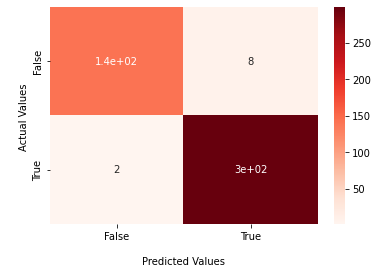

In [ ]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Reds')

#ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('\nActual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

performance

In [ ]:
RF = RandomForestClassifier( max_depth= 10, random_state=0, n_estimators=10)
RFF = RF.fit(xtrain, ytrain)
#Get the Score of Random Forest Classifier both Train and Test
RFM_Train = RF.score(xtrain, ytrain)
RFM_Test = RF.score(xtest, ytest)
print('Train Score: ' + str(RFM_Train))
print('Test Score: ' + str(RFM_Test))
#Predict value of RFM
RFM_pred = RF.predict(xtest)
print(RFM_pred[0:5])

Train Score: 0.9990494296577946
Test Score: 0.975609756097561
[0. 0. 1. 1. 1.]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import f1_score

f1_score(ytest, RFM_pred, average='weighted') 
# Compute confusion matrix  
RFM_matrix = confusion_matrix(ytest, RFM_pred)
np.set_printoptions(precision=2)

print (classification_report(ytest, RFM_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96       150
         1.0       0.98      0.99      0.98       301

    accuracy                           0.98       451
   macro avg       0.97      0.97      0.97       451
weighted avg       0.98      0.98      0.98       451



In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
lr.score(xtest,ytest)

0.7782705099778271

In [ ]:
from sklearn import svm
model=svm.SVC()
model.fit(xtrain,ytrain)
model.predict(xtest)
model.score(xtest,ytest)

0.8980044345898004

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,xtest,ytest,cv=10)
    knn_scores.append(score.mean())

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors = 3)
score=cross_val_score(knn_classifier,X,Y,cv=10)

In [ ]:
score.mean()

0.9441810154525386

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

abc = AdaBoostClassifier()

param_grid = {'n_estimators':[7]}

grid_abc = RandomizedSearchCV(abc,param_grid,n_iter=20,scoring='accuracy',cv = 10,refit = True)
grid_abc.fit(xtrain,ytrain)
print("Best Score ==> ", grid_abc.best_score_)
print("Tuned Paramerers ==> ",grid_abc.best_params_)
print("Accuracy on Train set ==> ", grid_abc.score(xtrain,ytrain))
print("Accuracy on Test set ==> ", grid_abc.score(xtest,ytest))

Best Score ==>  0.8165588499550763
Tuned Paramerers ==>  {'n_estimators': 7}
Accuracy on Train set ==>  0.8203422053231939
Accuracy on Test set ==>  0.8270509977827051


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 1 is smaller than n_iter=20. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


In [ ]:
#import xgboost as xgb

#xgbcl = xgb.XGBClassifier()

###param_grid = {'booster':['gbtree'],            
            # 'max_depth':[1]}

#grid_xgb = RandomizedSearchCV(xgbcl,param_grid,n_iter=30,scoring='accuracy',cv = 10,refit = True)
#$grid_xgb.fit(xtrain,ytrain)
#print("Best Score ==> ", grid_xgb.best_score_)
#print("Tuned Paramerers ==> ",grid_xgb.best_params_)
#print("Accuracy on Train set ==> ", grid_xgb.score(xtrain,ytrain))
#print("Accuracy on Test set ==> ", grid_xgb.score(xtest,ytest))

In [ ]:
#Classification Report

another 
